In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1 .Exploratory Data Analysis 

In [5]:
df=pd.read_csv('wine.csv')

In [6]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.size

2492

In [8]:
df.shape

(178, 14)

In [9]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [10]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


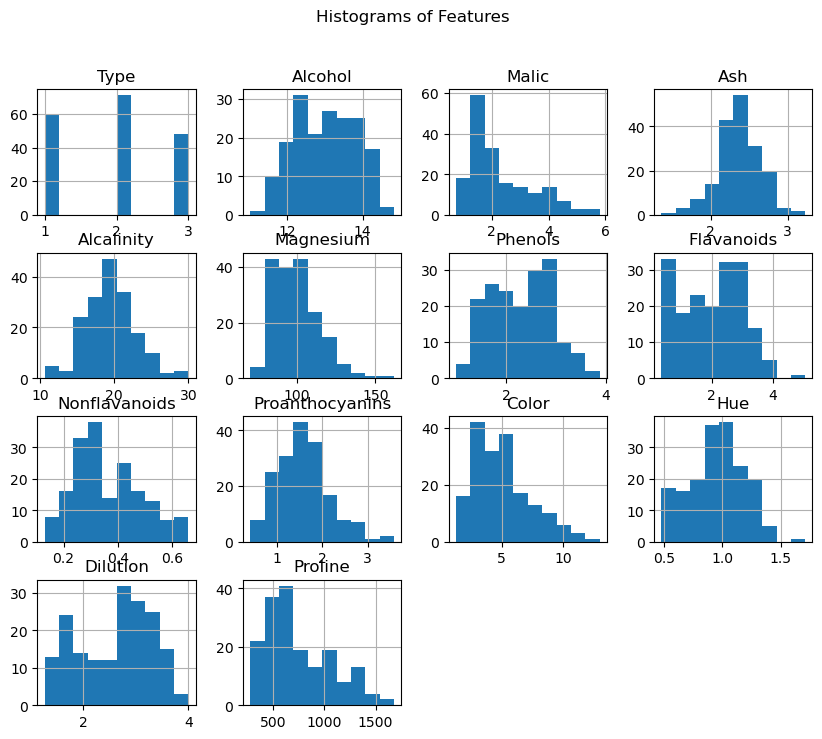

In [12]:
#histograms
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

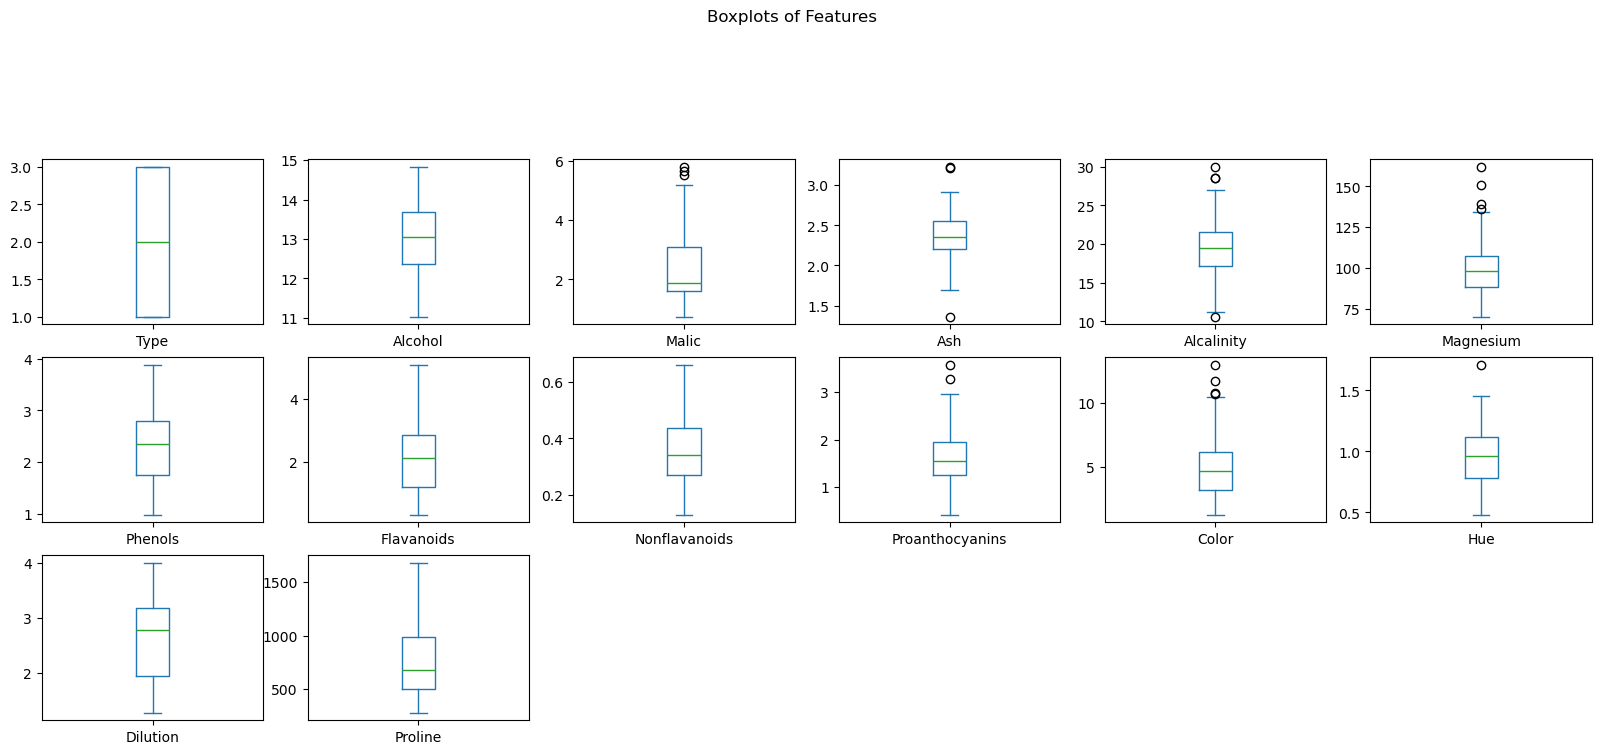

In [13]:
# Box plots
df.plot(kind='box', subplots=True,layout=(6,6),figsize=(20, 15))
plt.suptitle('Boxplots of Features')
plt.show()

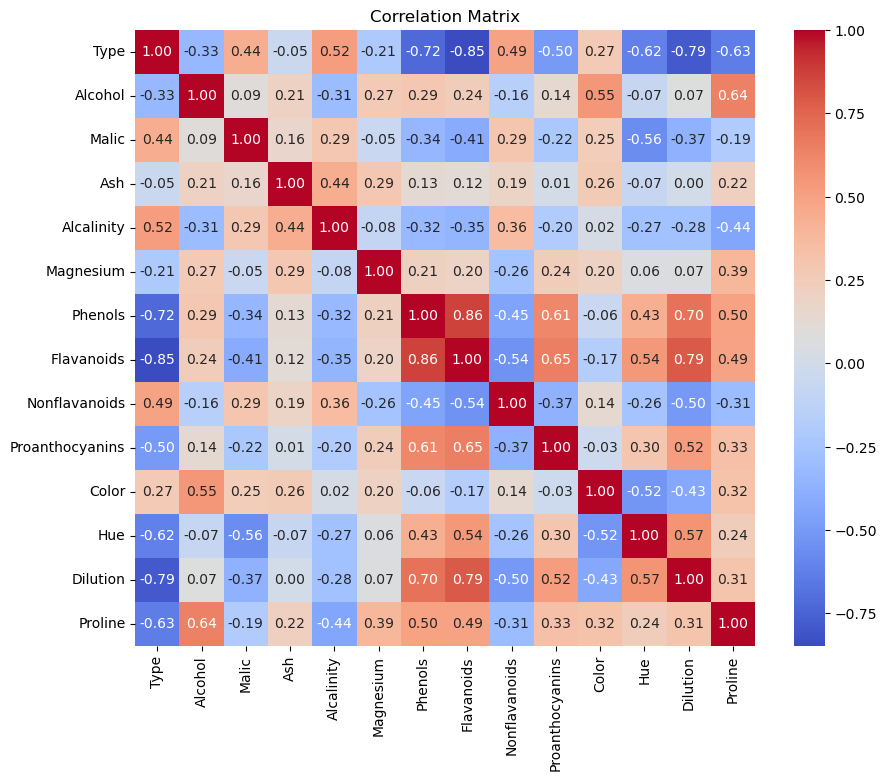

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 2. Dimensionality Reduction with PCA

In [15]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
std_scaler=StandardScaler()

In [17]:
scaled_data=std_scaler.fit_transform(df.drop(columns=['Type']))

In [18]:
pca=PCA()

In [19]:
pca.fit(scaled_data)

PCA()

In [20]:
exp_var=pca.explained_variance_ratio_

In [21]:
exp_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
cum_exp_var=exp_var.cumsum()

In [23]:
cum_exp_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

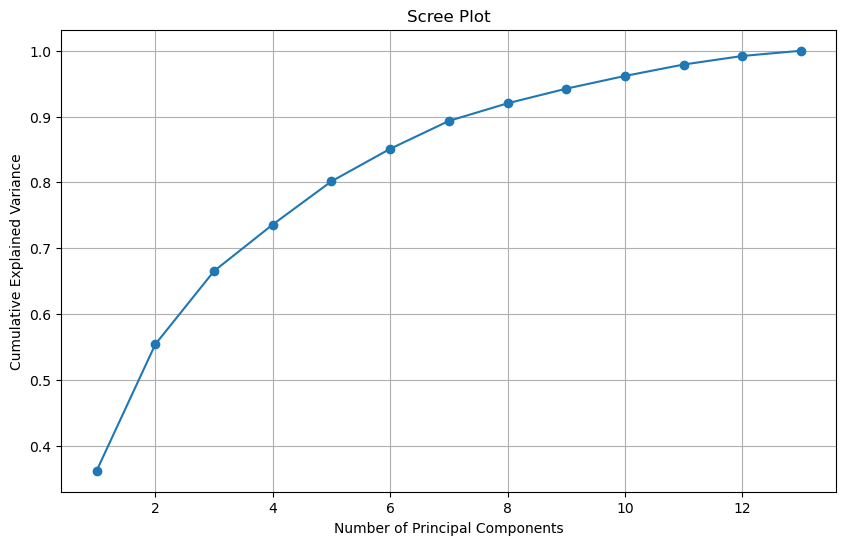

In [24]:
#scree plot

plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_var) + 1),cum_exp_var,marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [229]:
#Optimal number of principal analysis

In [25]:
n_components = 4

In [26]:
pca=PCA(n_components=4)
pca_data=pca.fit_transform(scaled_data)

# 3.Clustering with original data

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_data)

c:\Users\pprat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
original_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [30]:
silscore_original=silhouette_score(scaled_data,original_clusters)
silscore_original

np.float64(0.2848589191898987)

In [31]:
db_original= davies_bouldin_score(scaled_data,original_clusters)
db_original

np.float64(1.389187977718165)

In [32]:
data_with_clusters=df.copy()
data_with_clusters['Cluster']=cluster

NameError: name 'cluster' is not defined

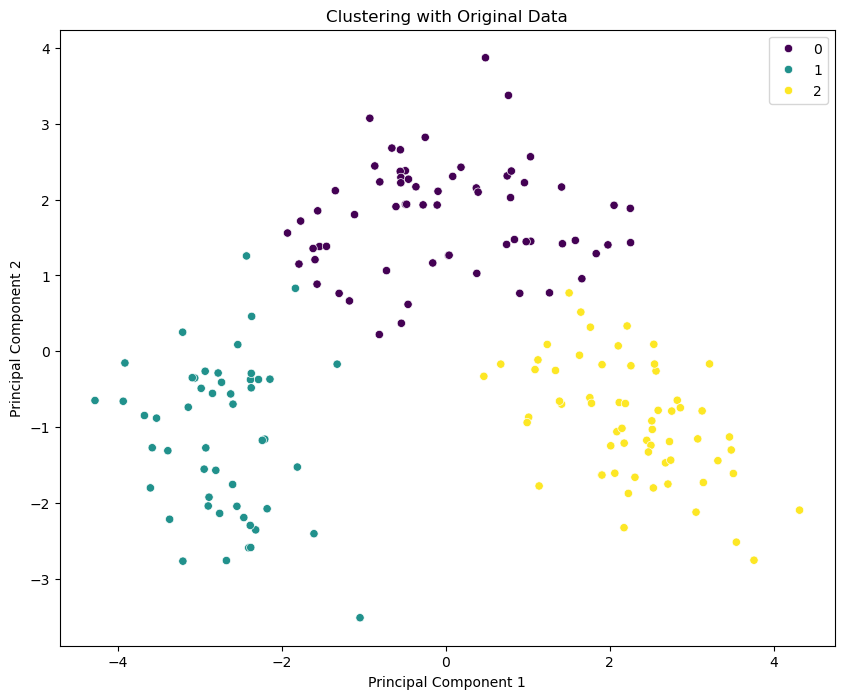

In [260]:
# Visualize the clusters using pairplot or other suitable plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 4.Clustering with PCA Data

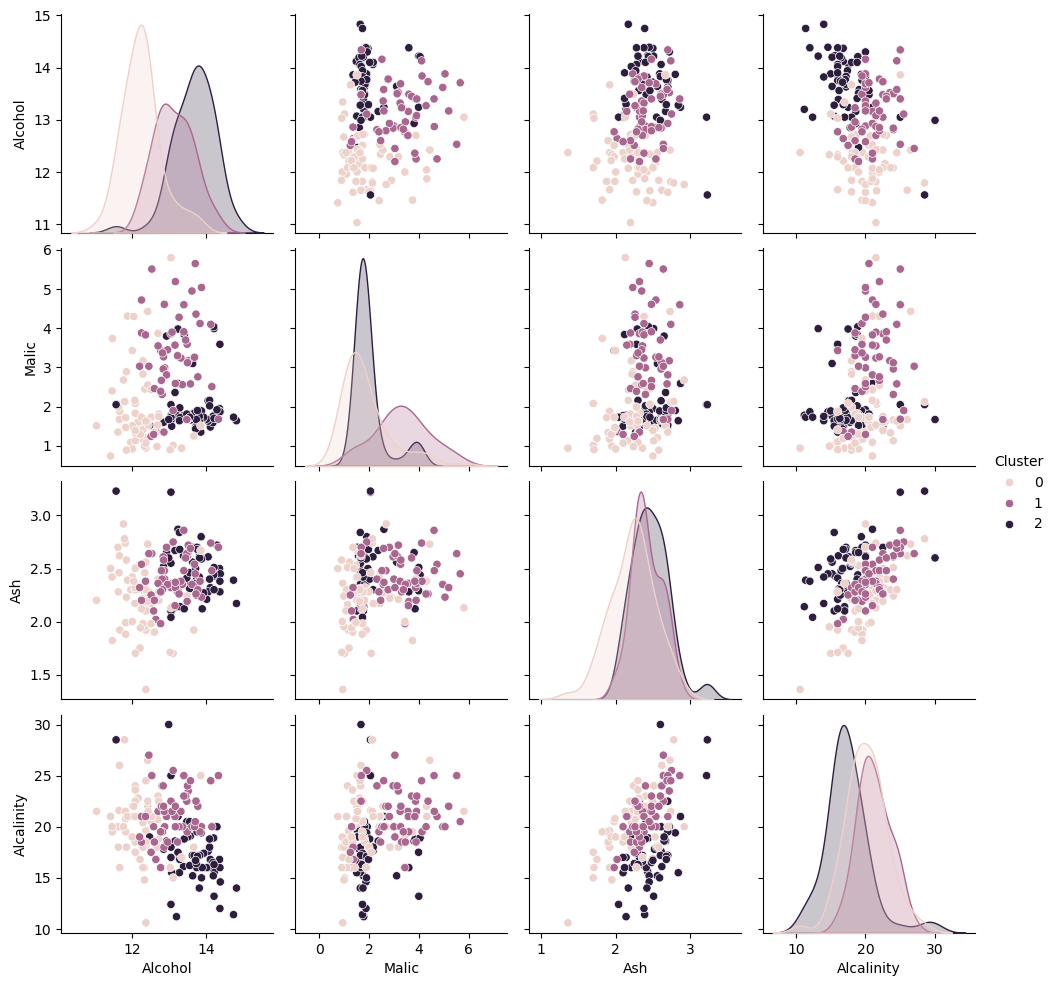

In [263]:
sns.pairplot(data_with_clusters,hue='Cluster',vars=['Alcohol','Malic','Ash','Alcalinity'])
plt.show()

In [264]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

C:\Users\Lenovo\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


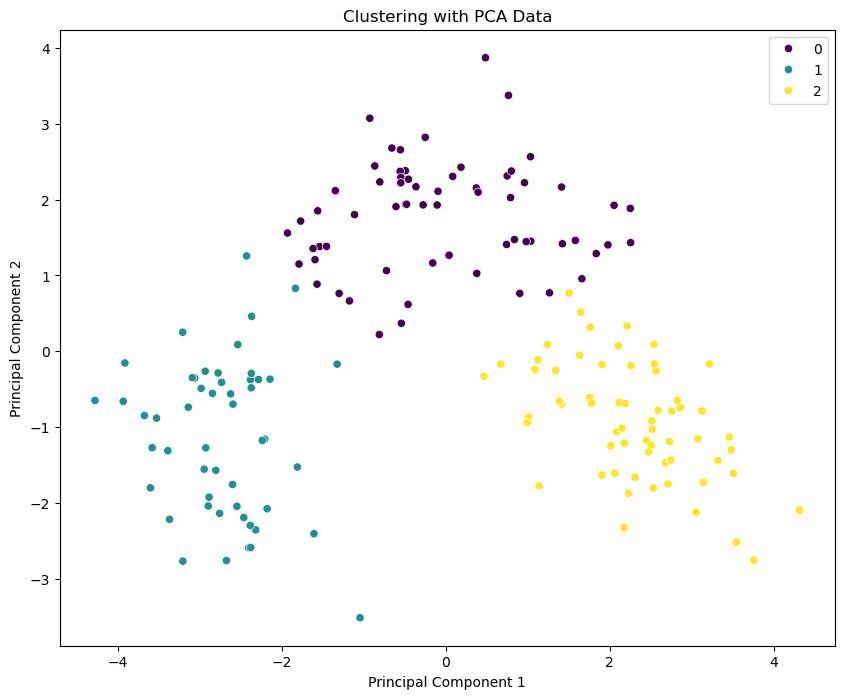

In [265]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [270]:
silscore_pca=silhouette_score(scaled_data,pca_clusters)
silscore_pca

0.2848589191898987

In [272]:
db_pca= davies_bouldin_score(scaled_data,pca_clusters)
db_pca

1.389187977718165

# 5.Comparison and analysis

In [282]:
print("Comparison of Clustering Performance:")
print("Silhouette Score (Original Data):", silscore_original)
print("Davies-Bouldin Score (Original Data):", db_original)
print("Silhouette Score (PCA Data):", silscore_pca)
print("Davies-Bouldin Score (PCA Data):", db_pca)

Comparison of Clustering Performance:
Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Score (Original Data): 1.389187977718165
Silhouette Score (PCA Data): 0.2848589191898987
Davies-Bouldin Score (PCA Data): 1.389187977718165


In [284]:
# 2. Discuss similarities/differences and impact of dimensionality reduction
print("\nAnalysis:")
print("The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.")
print("Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.")


Analysis:
The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.
Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.


# Task 6: Conclusion and Insights

In [287]:
# 1. Summarize key findings and insights
print("\nConclusion and Insights:")
print("In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.")
print("We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.")


Conclusion and Insights:
In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.
We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.


In [289]:
# 2. Discuss practical implications and recommendations
print("\nPractical Implications and Recommendations:")
print("PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.")
print("When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.")
print("However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.")
print("Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.")
print("Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.")


Practical Implications and Recommendations:
PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.
When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.
However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.
Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.
Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.
